In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from utils import (
    all_tasks_fetch_all_contrasts_zstats_vifs,
    summarize_extreme_voxels,
)


# Summarize what percentage of voxels are "outliers"
This is based on +/-2 and +/-3 SD from the mean across subjects within-contrast.  It requires that all zstat maps are in standard space.

In [2]:
# subject space data root (won't work for this)
# data_root = '/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS_20250402/derivatives/output_lev1'

data_root = '/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS_20250402/derivatives/output_lev1_mni'
zstat_vif_data = all_tasks_fetch_all_contrasts_zstats_vifs(data_root)

Skipping flanker, sub-s10 due to error: Expected 1 VIF file, found 0
Skipping nBack, sub-s03 due to error: index 0 is out of bounds for axis 0 with size 0
Skipping nBack, sub-s29 due to error: index 0 is out of bounds for axis 0 with size 0
Skipping nBack, sub-s19 due to error: index 0 is out of bounds for axis 0 with size 0
Skipping nBack, sub-s10 due to error: index 0 is out of bounds for axis 0 with size 0
Skipping nBack, sub-s43 due to error: index 0 is out of bounds for axis 0 with size 0


In [3]:
zstat_vif_data


,subid,task,contrast_names,vifs,zstat_files,session,task_contrast,subid_ses_vif
0,sub-s03,cuedTS,cue_switch_cost,1.05,/oak/stanford/groups/russpold/data/network_gra...,10,cuedTS: cue_switch_cost,sub-s03_ses_10: vif=1.05
1,sub-s03,cuedTS,cue_switch_cost,1.33,/oak/stanford/groups/russpold/data/network_gra...,06,cuedTS: cue_switch_cost,sub-s03_ses_06: vif=1.33
2,sub-s03,cuedTS,cue_switch_cost,1.12,/oak/stanford/groups/russpold/data/network_gra...,08,cuedTS: cue_switch_cost,sub-s03_ses_08: vif=1.12
3,sub-s03,cuedTS,cue_switch_cost,1.01,/oak/stanford/groups/russpold/data/network_gra...,04,cuedTS: cue_switch_cost,sub-s03_ses_04: vif=1.01
4,sub-s03,cuedTS,cue_switch_cost,1.01,/oak/stanford/groups/russpold/data/network_gra...,02,cuedTS: cue_switch_cost,sub-s03_ses_02: vif=1.01
...,...,...,...,...,...,...,...,...
960,sub-s43,stopSignal,task-baseline,5.70,/oak/stanford/groups/russpold/data/network_gra...,05,stopSignal: task-baseline,sub-s43_ses_05: vif=5.7
961,sub-s43,stopSignal,task-baseline,4.31,/oak/stanford/groups/russpold/data/network_gra...,07,stopSignal: task-baseline,sub-s43_ses_07: vif=4.31
962,sub-s43,stopSignal,task-baseline,6.56,/oak/stanford/groups/russpold/data/network_gra...,09,stopSignal: task-baseline,sub-s43_ses_09: vif=6.56
963,sub-s43,stopSignal,task-baseline,6.95,/oak/stanford/groups/russpold/data/network_gra...,01,stopSignal: task-baseline,sub-s43_ses_01: vif=6.95


In [4]:
outlier_summary = summarize_extreme_voxels(zstat_vif_data)

Processing 1/40: cuedTS: cue_switch_cost
Processing 2/40: cuedTS: response_time
Processing 3/40: cuedTS: task-baseline
Processing 4/40: cuedTS: task_switch_cost
Processing 5/40: cuedTS: task_switch_cue_switch-task_stay_cue_stay
Processing 6/40: directedForgetting: neg-con
Processing 7/40: directedForgetting: response_time
Processing 8/40: directedForgetting: task-baseline
Processing 9/40: flanker: incongruent-congruent
Processing 10/40: flanker: response_time
Processing 11/40: flanker: task-baseline
Processing 12/40: goNogo: go
Processing 13/40: goNogo: nogo_success
Processing 14/40: goNogo: nogo_success-go
Processing 15/40: goNogo: response_time
Processing 16/40: goNogo: task-baseline
Processing 17/40: shapeMatching: DDD
Processing 18/40: shapeMatching: DDS
Processing 19/40: shapeMatching: DNN
Processing 20/40: shapeMatching: DSD
Processing 21/40: shapeMatching: SDD
Processing 22/40: shapeMatching: SNN
Processing 23/40: shapeMatching: SSS
Processing 24/40: shapeMatching: main_vars
Pro

In [5]:
outlier_summary

,contrast_label,subid_vif,percent_extreme_voxels_2sd,percent_extreme_voxels_3sd
0,cuedTS: cue_switch_cost,sub-s03_ses_10: vif=1.05,8.196215,0.397186
1,cuedTS: cue_switch_cost,sub-s03_ses_06: vif=1.33,4.036825,0.117497
2,cuedTS: cue_switch_cost,sub-s03_ses_08: vif=1.12,5.937049,0.199054
3,cuedTS: cue_switch_cost,sub-s03_ses_04: vif=1.01,0.275081,0.005529
4,cuedTS: cue_switch_cost,sub-s03_ses_02: vif=1.01,3.871408,0.162653
...,...,...,...,...
960,stopSignal: task-baseline,sub-s43_ses_05: vif=5.7,4.626153,0.121644
961,stopSignal: task-baseline,sub-s43_ses_07: vif=4.31,1.075903,0.004608
962,stopSignal: task-baseline,sub-s43_ses_09: vif=6.56,0.029950,0.000000
963,stopSignal: task-baseline,sub-s43_ses_01: vif=6.95,3.825330,0.111046


## Percent outlier distributions
For each contrast/subject/session there's a measure of what percentage of voxels are more extreme than 2SD and 3SD of the mean.  These histograms show the distributions of these values.

Note, these results are based on the MNI data.  The intensities should be similar unless something very weird happened with the image registration, so keep that in mind.

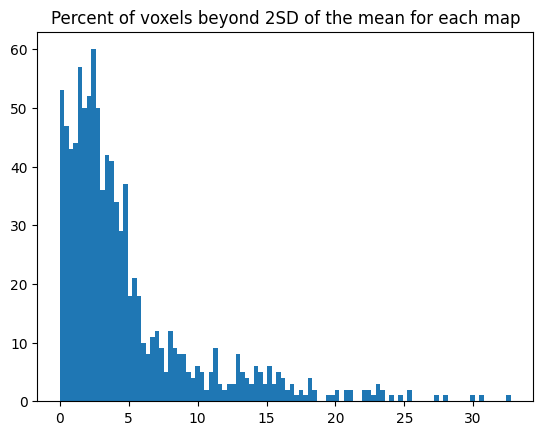

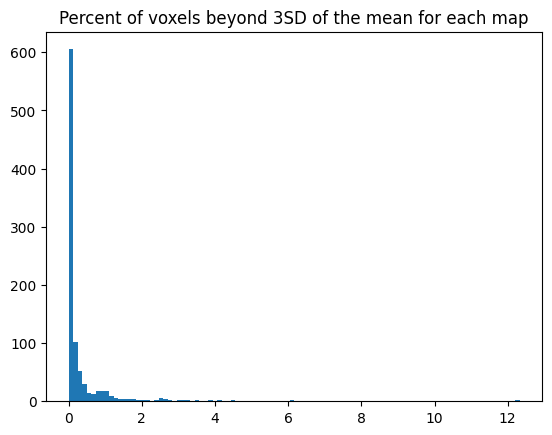

In [6]:
plt.hist(outlier_summary['percent_extreme_voxels_2sd'], 100)
plt.title('Percent of voxels beyond 2SD of the mean for each map')
plt.show()


plt.hist(outlier_summary['percent_extreme_voxels_3sd'], 100)
plt.title('Percent of voxels beyond 3SD of the mean for each map')
plt.show()

In [7]:
outlier_summary.loc[outlier_summary['percent_extreme_voxels_2sd'] > 20].sort_values(
    by='percent_extreme_voxels_2sd', ascending=False
)

,contrast_label,subid_vif,percent_extreme_voxels_2sd,percent_extreme_voxels_3sd
673,spatialTS: task-baseline,sub-s29_ses_03: vif=4.19,32.733254,9.917660
948,stopSignal: task-baseline,sub-s29_ses_01: vif=5.35,30.569008,9.419105
746,stopSignal: go,sub-s29_ses_01: vif=3.59,29.917476,9.261520
686,spatialTS: task-baseline,sub-s43_ses_08: vif=3.69,28.127837,7.529017
796,stopSignal: stop_failure,sub-s29_ses_01: vif=1.86,27.218733,7.822529
67,cuedTS: task-baseline,sub-s43_ses_03: vif=5.64,25.459505,6.958581
832,stopSignal: stop_failure-go,sub-s10_ses_06: vif=0.99,25.370576,6.286775
757,stopSignal: go,sub-s10_ses_06: vif=2.67,24.725495,6.255443
408,shapeMatching: DDS,sub-s10_ses_06: vif=1.94,23.935271,6.560474
190,directedForgetting: task-baseline,sub-s43_ses_04: vif=13.61,23.392020,5.037622


In [8]:
outlier_summary.loc[outlier_summary['percent_extreme_voxels_3sd'] > 10]

,contrast_label,subid_vif,percent_extreme_voxels_2sd,percent_extreme_voxels_3sd
626,spatialTS: cue_switch_cost,sub-s19_ses_04: vif=0.88,15.772231,12.322891
729,spatialTS: task_switch_cue_switch-task_stay_cu...,sub-s19_ses_04: vif=0.96,14.528607,12.291097
